#### Msc AI - Sem 1 - Etivity 5

Name:Michel Danjou

ID:18263461


# Lab 5: Feature Selection 

This notebook builds on top of Lab 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds data set (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same data set used in Lab 4.

## A. Preparation

### Import Python modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Task 1

  * Repeat the experiment in Etivity5-Feature Selection.ipynb with winequality_red.csv and draw initial conclusions from the results you observe.

  * Rubric: None

  * Download the Jupyter notebook Etivity5-Feature Selection and the data set seeds_dataset_binary.csv from GitLab and look through the notebook.
  
  * Download the data set winequality_red.csv from GitLab. This is one of the public UCI datasets.
 

## A. Preparation

### Load and prepare the dataset for training and evaluation
Feel free to apply any other pre-processing technique at this point.

In [2]:
lab5_df = pd.read_csv("./winequality_red.csv")
lab5_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# target attribute
target_attribute_name = 'quality'
target = lab5_df[target_attribute_name]

# predictor attributes
predictors = lab5_df.drop(target_attribute_name, axis=1).values

Split the data set into a training (80%) and test (20%) data sets.

In [4]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

In [5]:
# scale all predictor values to the range [0, 1] after calling train_test_split() to avoid data snooping
min_max_scaler = preprocessing.MinMaxScaler()

predictors_train = min_max_scaler.fit_transform(predictors_train)
predictors_test = min_max_scaler.fit_transform(predictors_test)

In [6]:
target.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## B. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [7]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False False False False False False False  True  True]
[5 1 9 4 2 8 3 6 7 1 1]


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [8]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression()
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True False False False False  True False False False  True]
[8 1 4 9 7 5 1 3 6 2 1]


## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [9]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [10]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [11]:
classifier = svm.SVC()

In [12]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.590625

In [13]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.565625

In [14]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.571875

## C. Conclusion

The results above, give evidence that model1 is most accurate.

However, when you execute this code again, it is very likely to get different results.

To get more accurate results, accounting for the variance in the results, it is better to run the whole experiment multiple times and measure the variance in the results. Then pick the model that gives better results.

# Task 2
  * Repeat the experiment in Etivity5-Feature Selection.ipynb with winequality_red.csv but this time run the whole experiment in a loop with different training/test stratified splits. 
  * Evaluate the three models for each iteration of the loop separately and boxplot the accuracies of the models for each iteration. 
  * Compare the results of this experiment to the results of Task 1 in a markdown cell (max 150 words).
  
#### Resources
  * https://machinelearningmastery.com/an-introduction-to-feature-selection/
  * https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
  * https://stats.stackexchange.com/questions/264533/how-should-feature-selection-and-hyperparameter-optimization-be-ordered-in-the-m


#### Rubric

| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| Loop implemented with run-time errors.      | Loop runs without errors. Feature selection performed outside the loop. | Loop implemented correctly with feature selection performed inside the loop. Results not box-plotted or summarised correctly. |Loop implemented correctly with feature selection performed inside the loop. Results box-plotted and summarised correctly.|


#### Additional information regarding the stratified parameter used by train_test_split
https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

This `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter `stratify`.

For example, if variable `y` is a binary categorical variable with values `0` and `1` and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that your random split has 25% of `0's` and 75% of `1's`.

In [15]:
def experiment(estimator, repeats, predictors_train, predictors_test, target_train, target_test, use_rfe=True):

    if (use_rfe):        
        selector = RFE(estimator, 3)
        selector = selector.fit(predictors_train, target_train)
        
        predictors_train_selected = selector.transform(predictors_train)
        predictors_test_selected = selector.transform(predictors_test)
    else:
        predictors_train_selected = predictors_train
        predictors_test_selected = predictors_test

    # score classifier
    classifier = svm.SVC()
    model = classifier.fit(predictors_train_selected, target_train)
    model_score = model.score(predictors_test_selected, target_test)
        
    return model_score;
    

def whole_experiment(repeats):
    rfe_svm_scores = []
    rfe_lr_scores = []
    no_rfe_scores = []

    for i in range (0, repeats):
        print("Experiment iteration:", i)
        
        # stratified train_test_split
        predictors_train, predictors_test, target_train, target_test = train_test_split(
        predictors, target, test_size=0.20, shuffle=True, stratify=target)
        
        # normalise
        predictors_train = min_max_scaler.fit_transform(predictors_train)
        predictors_test = min_max_scaler.fit_transform(predictors_test)
        
        # SVM
        estimatorSVM = svm.SVR(kernel="linear")
        rfe_svm_scores.append(experiment(estimatorSVM, repeats, predictors_train, predictors_test, target_train, target_test))
        
        # LR
        estimatorLR = LogisticRegression()
        rfe_lr_scores.append(experiment(estimatorLR, repeats, predictors_train, predictors_test, target_train, target_test))
        
        # Normal
        no_rfe_scores.append(experiment(None, repeats, predictors_train, predictors_test, target_train, target_test, use_rfe=False))
        
    return rfe_svm_scores, rfe_lr_scores, no_rfe_scores

# Run the whole experiment
rfe_svm_scores, rfe_lr_scores, no_rfe_scores = whole_experiment(100)
print("rfe_svm_scores: ", rfe_svm_scores)
print("\n\n rfe_lr_scores :", rfe_lr_scores)
print("\n\n no_rfe_scores : ", no_rfe_scores)


Experiment iteration: 0
Experiment iteration: 1
Experiment iteration: 2
Experiment iteration: 3
Experiment iteration: 4
Experiment iteration: 5
Experiment iteration: 6
Experiment iteration: 7
Experiment iteration: 8
Experiment iteration: 9
Experiment iteration: 10
Experiment iteration: 11
Experiment iteration: 12
Experiment iteration: 13
Experiment iteration: 14
Experiment iteration: 15
Experiment iteration: 16
Experiment iteration: 17
Experiment iteration: 18
Experiment iteration: 19
Experiment iteration: 20
Experiment iteration: 21
Experiment iteration: 22
Experiment iteration: 23
Experiment iteration: 24
Experiment iteration: 25
Experiment iteration: 26
Experiment iteration: 27
Experiment iteration: 28
Experiment iteration: 29
Experiment iteration: 30
Experiment iteration: 31
Experiment iteration: 32
Experiment iteration: 33
Experiment iteration: 34
Experiment iteration: 35
Experiment iteration: 36
Experiment iteration: 37
Experiment iteration: 38
Experiment iteration: 39
Experiment

In [16]:
dataset = pd.DataFrame({'RFE SVM':rfe_svm_scores, 'RFE LR': rfe_lr_scores, 'No RFE':no_rfe_scores })
dataset.describe()

,RFE SVM,RFE LR,No RFE
count,100.000000,100.000000,100.000000
mean,0.564531,0.560406,0.562969
std,0.023680,0.025880,0.023764
min,0.490625,0.490625,0.490625
25%,0.552344,0.546875,0.552344
50%,0.565625,0.562500,0.562500
75%,0.581250,0.575000,0.581250
max,0.615625,0.631250,0.625000


Text(0.5,0.98,'')

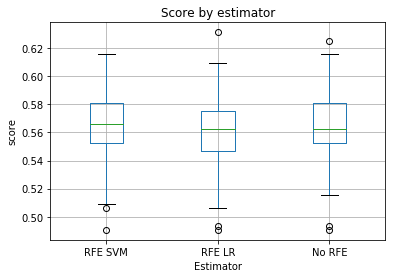

In [17]:
dataset.boxplot()
plt.title("Score by estimator")
plt.xlabel('Estimator')
plt.ylabel('score')

plt.suptitle("")

#### Observations
We can see that the mean score and associated variance is nearly the same for the 3 models.

The **best mean score comes from RFE on Logitic Regression**, followed closely by the model with no RFE and the model using RFE on SVM.

This shows that we don't need all the features in order to get the same accuracy as if we had the whole data set.

# Task 3
  * Build two pipelines for training classifiers for the dataset winequality_red.csv and summarise the results from training classifiers with the pipelines in a markdown cell (max 150 words).
  * The two pipelines should include feature-selection methods, and the feature-selection method in pipeline 1 should be different from the feature-selection method in pipeline 2.

#### Resources:
  * https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/
  * https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
  * https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
  
#### Rubric

| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| Pipelines attempted but with run-time errors.    | One pipeline implemented without errors. Results not summarised. | Two pipelines implemented without errors but both using the same feature-selection method. Results summarised. | Two pipelines implemented without errors. The feature-selection method in pipeline 1 different from the feature-selection method in pipeline 2. Results summarised. |


### Pipeline 1

In [18]:
# create feature union
features = []
features.append(('rfe', RFE(LogisticRegression(), 3)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, predictors, target, cv=kfold)
print(results.mean())

0.5084394654088051


### Pipeline 2

In [19]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, predictors, target, cv=kfold)
print(results.mean())

0.5728577044025157


### Observations

We can see that the pipeline using PCA is produces a model mean accuracy superior to the the pipeline using RFE. (57% pca vs 50% for RFE)

Both PCA and RFE are using 3 features only. This shows that the features computed by PCA are more representative of the data set than the features selected by RFE.
